# Data loading

In [2]:
print("Hello Jupyter")


Hello Jupyter


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

numpy: 2.2.6
pandas: 2.3.1
matplotlib: 3.10.5
seaborn: 0.13.2


In [5]:

df = pd.read_csv("mesa_agent_results.csv")
df.head()


,day,hour,step,agent_id,agent_type,room,current_temp,comfort_level,using_ac,preferred_temp
0,NaN,NaN,0,student_0,student,Zone_Classroom_7315,23.439946,23.44,False,24.509651
1,NaN,NaN,0,student_1,student,Zone_Classroom_7315,23.439946,23.44,True,25.467146
2,NaN,NaN,0,student_2,student,Zone_Classroom_7315,23.439946,23.44,False,25.421496
3,NaN,NaN,0,student_3,student,Zone_Classroom_7315,23.439946,23.44,False,24.561982
4,NaN,NaN,0,student_4,student,Zone_Classroom_7302,23.393921,23.39,False,24.022999


In [6]:
df.isnull().sum()

day               25344
hour              25344
step                  0
agent_id              0
agent_type            0
room                  0
current_temp          0
comfort_level         0
using_ac              0
preferred_temp        0
dtype: int64

In [7]:
df['comfort_level'] = df['comfort_level'].fillna(0)

In [8]:
df.dtypes

day               float64
hour              float64
step                int64
agent_id           object
agent_type         object
room               object
current_temp      float64
comfort_level     float64
using_ac             bool
preferred_temp    float64
dtype: object

In [9]:
df.describe()

,day,hour,step,current_temp,comfort_level,preferred_temp
count,0.0,0.0,25344.000000,25344.000000,25344.000000,25344.000000
mean,NaN,NaN,143.500000,24.808229,24.210118,25.236176
std,NaN,NaN,83.139578,0.843978,0.844678,0.898433
min,NaN,NaN,0.000000,23.264241,20.360000,24.005985
25%,NaN,NaN,71.750000,24.059019,23.640000,24.512570
50%,NaN,NaN,143.500000,24.945201,24.110000,25.205353
75%,NaN,NaN,215.250000,25.346799,24.920000,25.754618
max,NaN,NaN,287.000000,27.650274,27.650000,27.987544


In [10]:
print(df['step'].min(), df['step'].max())
print(df['day'].unique())


0 287
[nan]


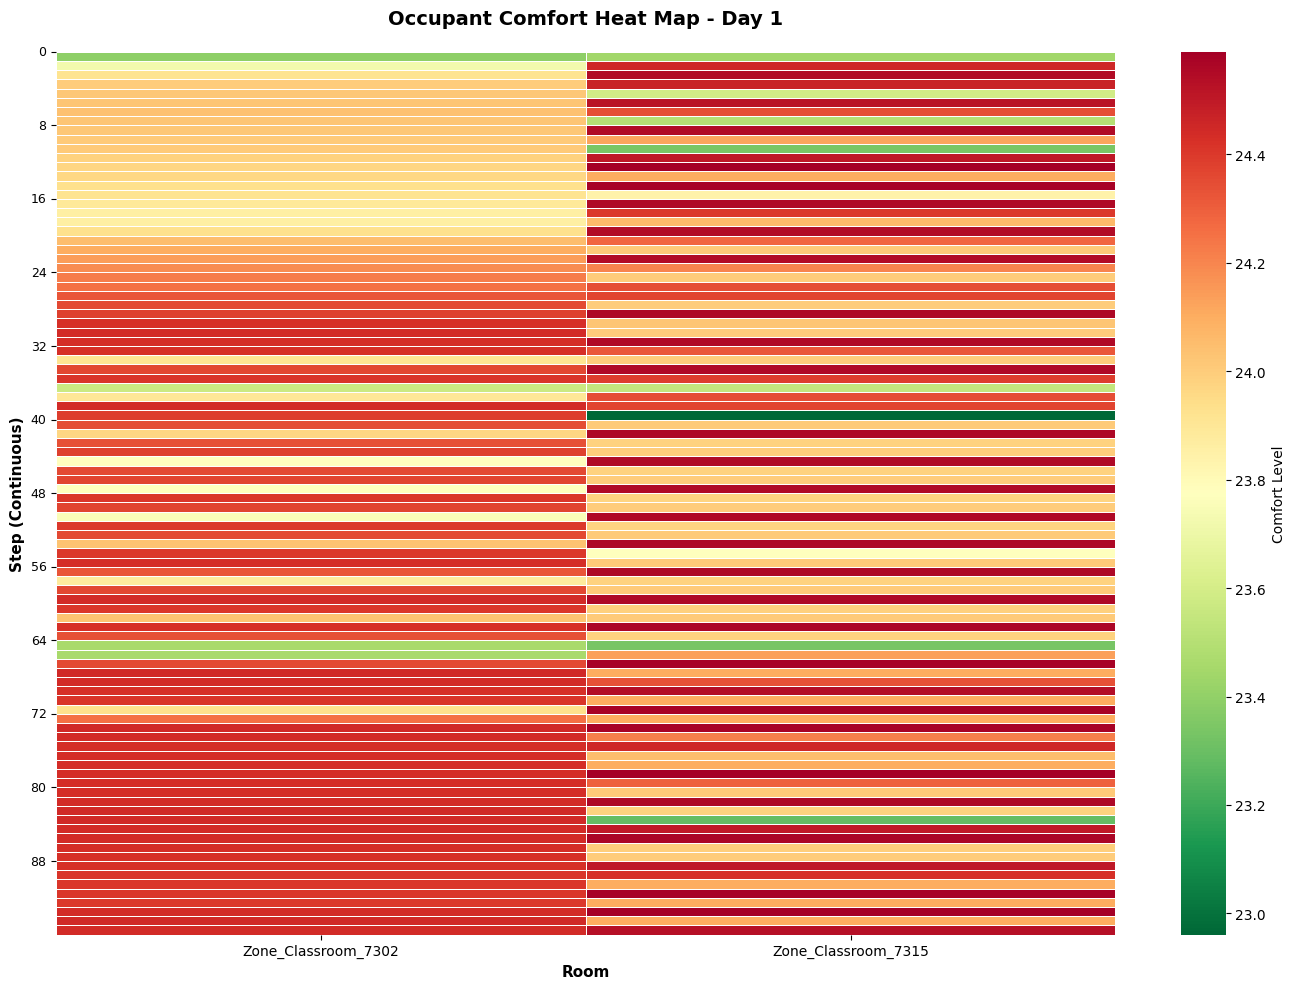

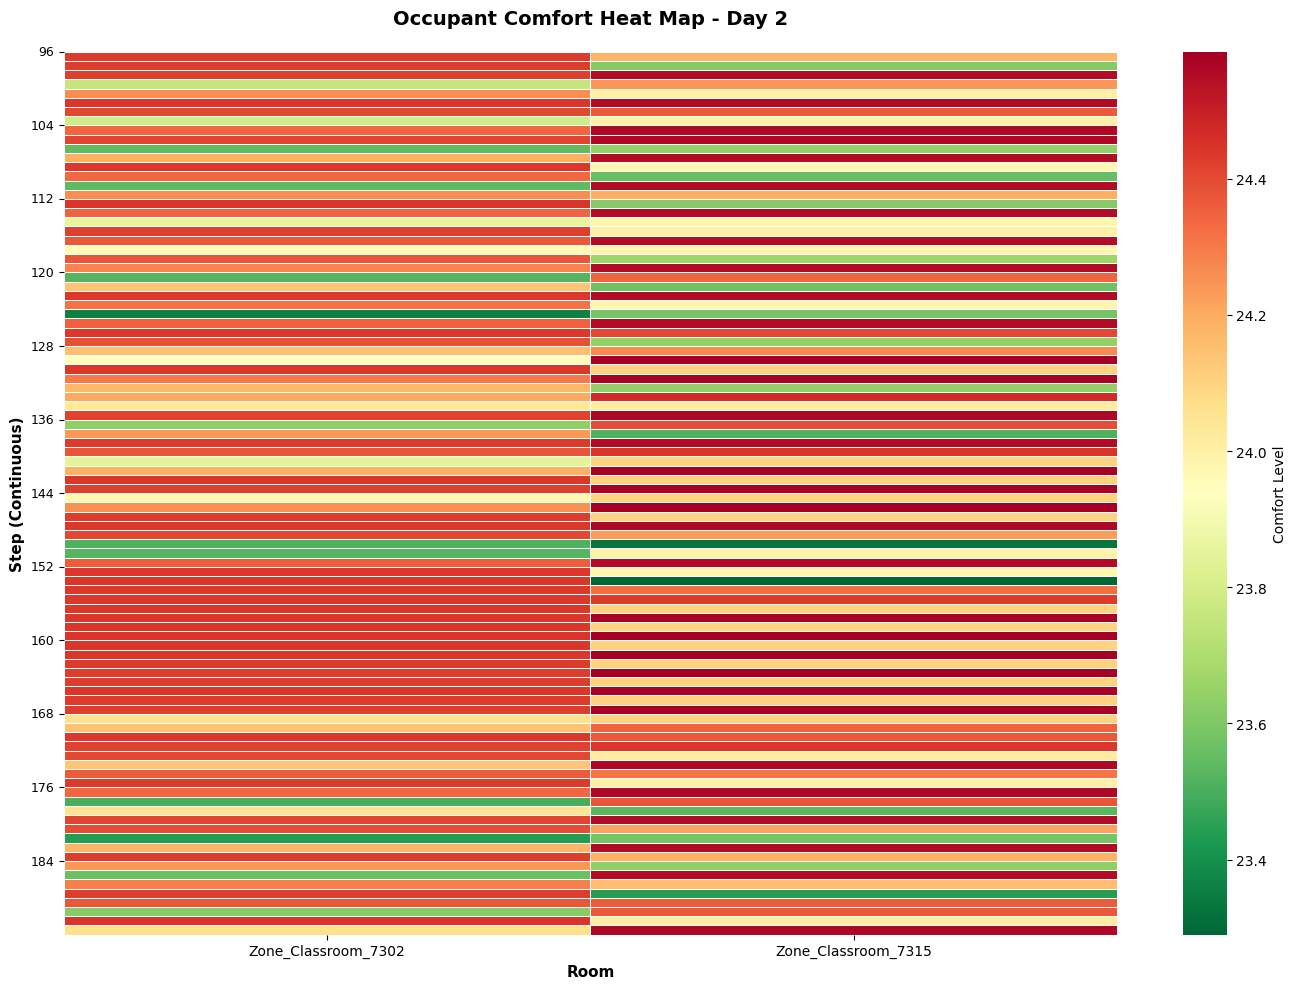

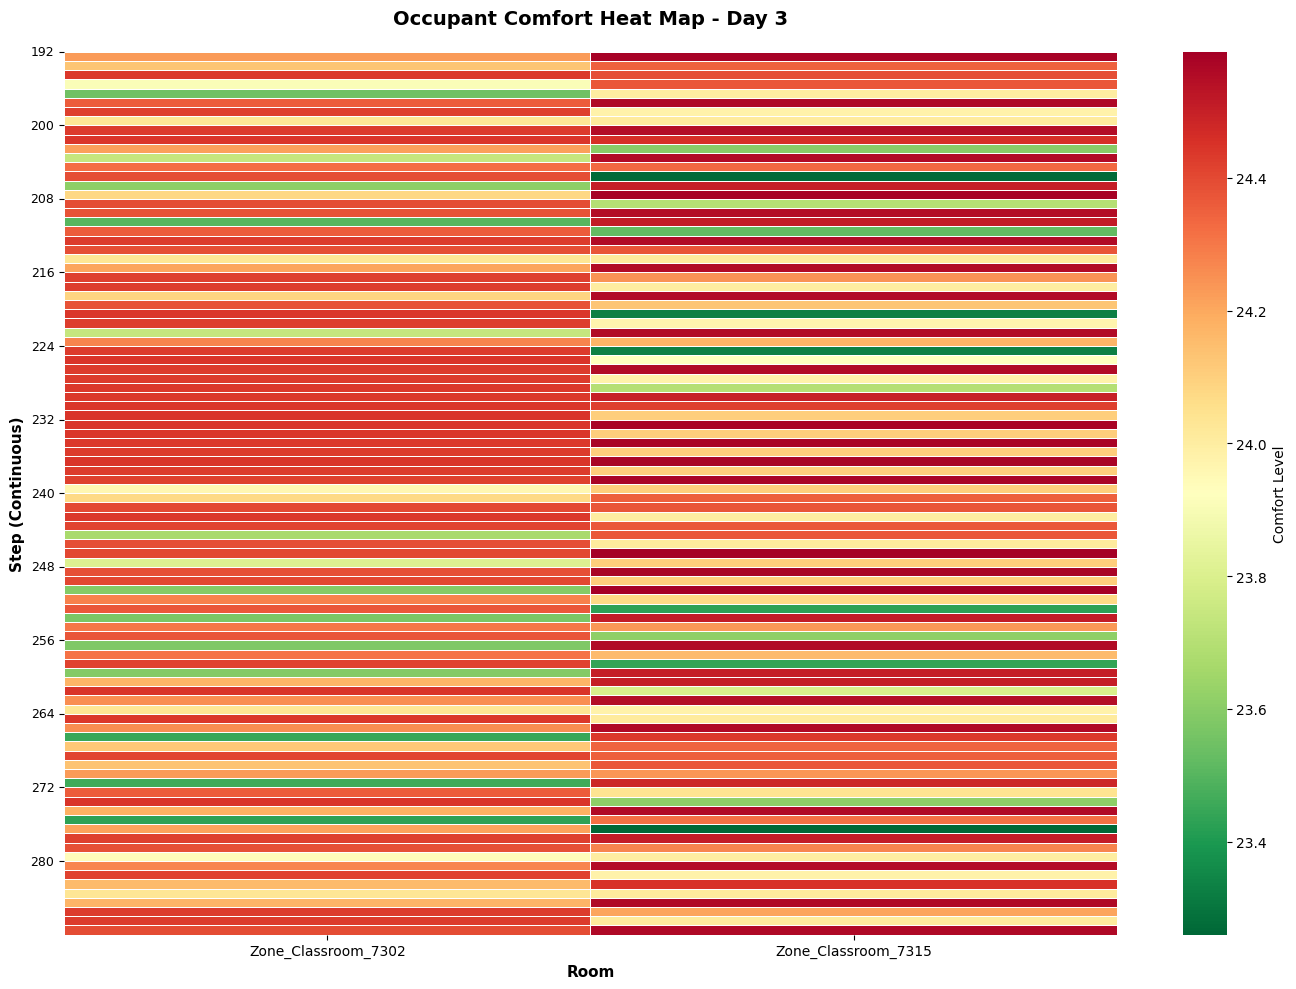

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างคอลัมน์ day เพื่อแยก plot
df['day'] = (df['step'] // 96) + 1
num_days = df['day'].max()

for day in range(1, num_days + 1):
    df_day = df[df['day'] == day].copy()
    
    if len(df_day) == 0:
        continue
    
    # pivot table โดยใช้ step ต่อเนื่อง
    pivot_df = df_day.pivot_table(
        index='step',        # step ต่อเนื่อง ไม่รีเซ็ต
        columns='room',
        values='comfort_level',
        aggfunc='mean'
    )
    
    plt.figure(figsize=(14, 10))
    
    sns.heatmap(
        pivot_df,
        cmap='RdYlGn_r',    # _r = กลับสี → แดง = สูง (ร้อน), เขียว = ต่ำ (สบาย)
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Comfort Level'}
    )
    
    plt.title(f'Occupant Comfort Heat Map - Day {day}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Room', fontsize=11, fontweight='bold')
    plt.ylabel('Step (Continuous)', fontsize=11, fontweight='bold')
    
    # แสดงทุก 8 steps (2 ชั่วโมง)
    step_values = pivot_df.index.values
    if len(step_values) > 8:
        yticks_positions = list(range(0, len(pivot_df), 8))
        yticks_labels = [step_values[i] for i in yticks_positions]
        plt.yticks(yticks_positions, yticks_labels, rotation=0, fontsize=9)
    
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


# Analysis

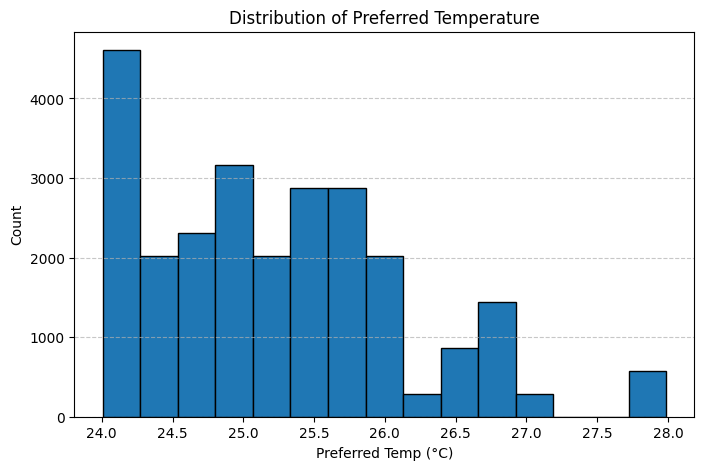

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df["preferred_temp"].to_numpy(), bins=15, edgecolor="black")
plt.xlabel("Preferred Temp (°C)")
plt.ylabel("Count")
plt.title("Distribution of Preferred Temperature")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df['day'] = (df['step'] // 96) + 1
df['hour'] = (df['step'] % 96) / 4  # สมมติ 1 step = 15 นาที
df['ac_on'] = df['using_ac'].astype(int)

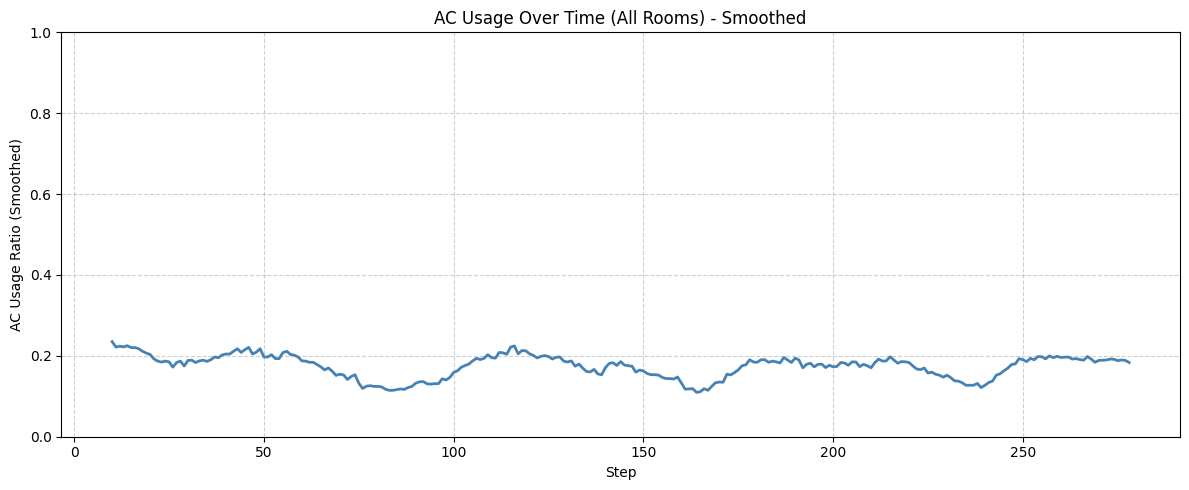

In [75]:
# ---------- 1. AC Usage Over Time (รวมทุกห้อง) ----------
# plt.figure(figsize=(12, 5))
# sns.lineplot(data=df.groupby('step')['ac_on'].mean().reset_index(), x='step', y='ac_on')
# plt.title("AC Usage Over Time (All Rooms)")
# plt.xlabel("Step")
# plt.ylabel("AC Usage Ratio")
# plt.grid(True, linestyle="--", alpha=0.6)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(12, 5))

# เตรียมข้อมูล AC usage โดยเฉลี่ยราย step
ac_usage = df.groupby('step')['ac_on'].mean().reset_index()

# ทำ Moving Average (ค่าเฉลี่ยเคลื่อนที่) ให้เส้นเรียบขึ้น
window = 20   # ลองปรับได้ เช่น 4, 8, 12
ac_usage['smooth'] = ac_usage['ac_on'].rolling(window=window, center=True).mean()

sns.lineplot(data=ac_usage, x='step', y='smooth', linewidth=2, color='steelblue')

plt.title("AC Usage Over Time (All Rooms) - Smoothed")
plt.xlabel("Step")
plt.ylabel("AC Usage Ratio (Smoothed)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 1)  # คงแกนให้อยู่ในช่วง 0-1
plt.tight_layout()

plt.savefig("ac_usage_over_time_(all_rooms).png", dpi=300)
plt.show()


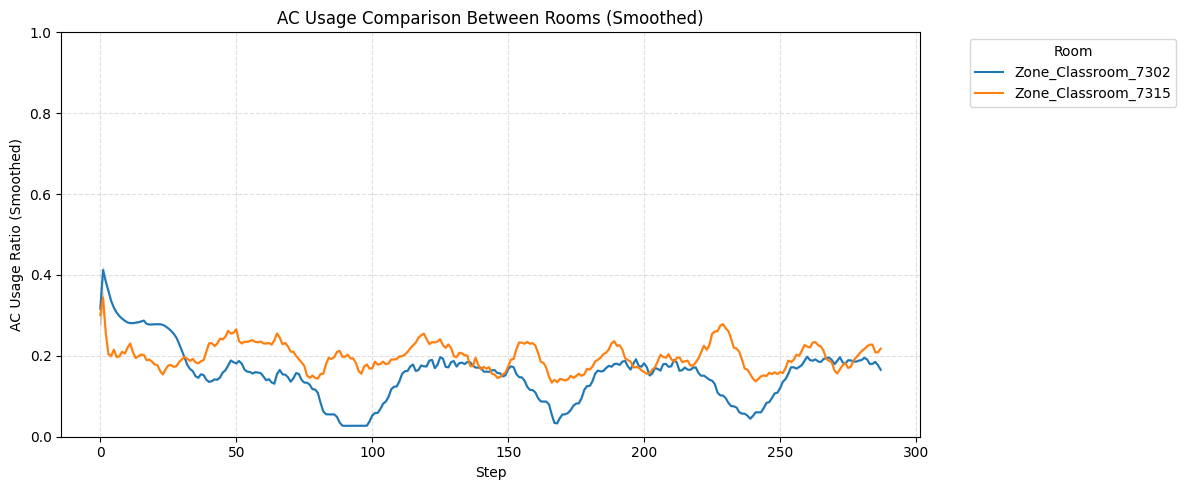

In [74]:
# ---------- 2. AC Usage Comparison Between Rooms ----------
# plt.figure(figsize=(12, 5))
# sns.lineplot(data=df, x='step', y='ac_on', hue='room')
# plt.title("AC Usage Comparison Between Rooms")
# plt.xlabel("Step")
# plt.ylabel("AC On (1=True, 0=False)")
# plt.legend(title="Room")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 5))

# คำนวณ rolling mean แยกตามห้อง (เช่น window=30 step)
df_sorted = df.sort_values(['room', 'step'])
df_sorted['ac_usage_smooth'] = (
    df_sorted.groupby('room')['ac_on']
    .transform(lambda x: x.rolling(window=600, min_periods=1).mean())
)

sns.lineplot(data=df_sorted, x='step', y='ac_usage_smooth', hue='room')

plt.title("AC Usage Comparison Between Rooms (Smoothed)")
plt.xlabel("Step")
plt.ylabel("AC Usage Ratio (Smoothed)")
plt.ylim(0, 1)  # ให้ช่วงแกน Y อยู่ระหว่าง 0–1 ดูง่าย
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Room", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("ac_usage_comparison_between_rooms.png", dpi=300)
plt.show()


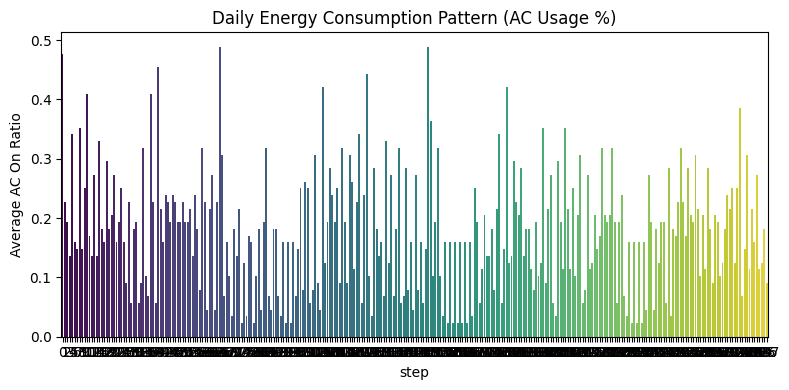

In [34]:
# ---------- 3. Daily Energy Consumption Pattern ----------
daily_ac = df.groupby('step')['ac_on'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(
    data=daily_ac,
    x='step', 
    y='ac_on', 
    hue='step',        # เพิ่ม hue เดียวกับ x
    palette='viridis',
    legend=False      # ไม่ต้องแสดง legend
)
plt.title("Daily Energy Consumption Pattern (AC Usage %)")
plt.ylabel("Average AC On Ratio")
plt.tight_layout()
plt.show()

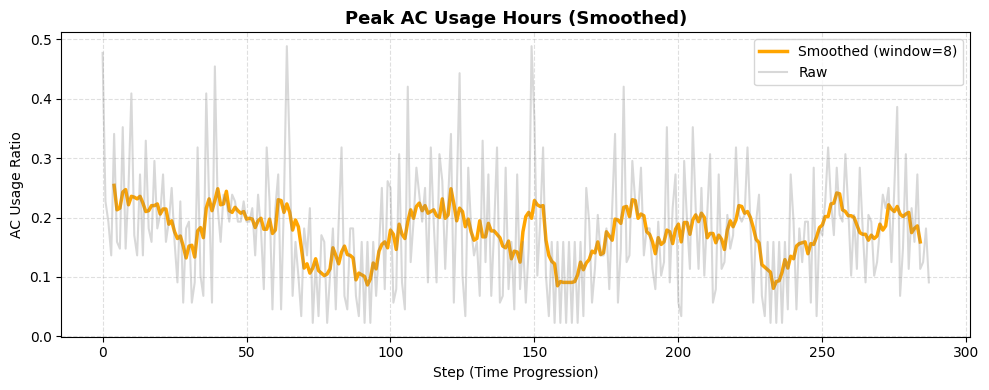

In [73]:
# ---------- 4. Peak Usage Hours (Smoothed) ----------
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# รวมข้อมูลตาม step แล้วหาค่าเฉลี่ย AC On
hourly = df.groupby('step')['ac_on'].mean().reset_index()

# ใช้ rolling window เพื่อให้เส้นเรียบขึ้น
window_size = 8  # ขนาด window เช่น 8 step ≈ 2 ชั่วโมง (ถ้า 1 step = 15 นาที)
hourly['ac_on_smooth'] = hourly['ac_on'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly, x='step', y='ac_on_smooth', color='orange', linewidth=2.5, label=f'Smoothed (window={window_size})')
sns.lineplot(data=hourly, x='step', y='ac_on', color='gray', alpha=0.3, label='Raw')

plt.title("Peak AC Usage Hours (Smoothed)", fontsize=13, fontweight='bold')
plt.xlabel("Step (Time Progression)")
plt.ylabel("AC Usage Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig("peak_ac_usage_hours.png", dpi=300)
plt.show()


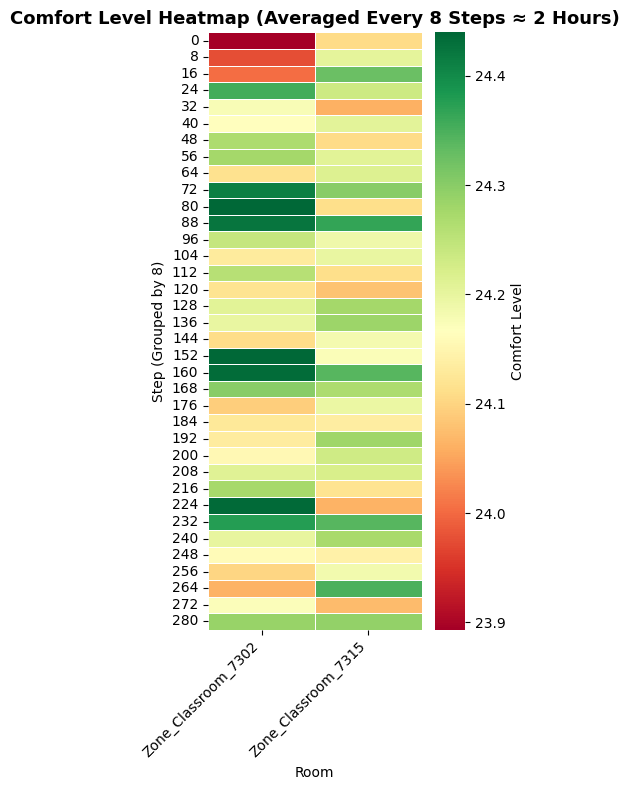

In [50]:
# ---------- 5. Comfort Level Heatmap (เฉลี่ยทุก 8 step ≈ 2 ชม.) ----------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สมมติ df มีคอลัมน์: 'step', 'room', 'comfort_level'
df['step_group'] = (df['step'] // 8) * 8  # จัดกลุ่ม step ละ 8

# หาค่าเฉลี่ย comfort level ในแต่ละกลุ่มและแต่ละห้อง
agg_df = df.groupby(['step_group', 'room'])['comfort_level'].mean().reset_index()

# Pivot เพื่อทำ heatmap
pivot_df = agg_df.pivot(index='step_group', columns='room', values='comfort_level')

# ---------- Plot ----------
plt.figure(figsize=(4, 8))  # ลดความกว้างลงจาก 14 → 10
sns.heatmap(
    pivot_df,
    cmap='RdYlGn',
    cbar_kws={'label': 'Comfort Level'},
    linewidths=0.5,
    annot=False,
    square=False,          # อนุญาตให้ช่องเป็นแนวตั้งมากกว่าแนวนอน
    xticklabels=True,
    yticklabels=True
)

plt.title("Comfort Level Heatmap (Averaged Every 8 Steps ≈ 2 Hours)", fontsize=13, fontweight='bold')
plt.xlabel("Room")
plt.ylabel("Step (Grouped by 8)")
plt.xticks(rotation=45, ha='right')  # หมุนชื่อห้องไม่ให้ทับกัน
plt.tight_layout()

plt.savefig("comfort_heatmap.png", dpi=300)  
plt.show()


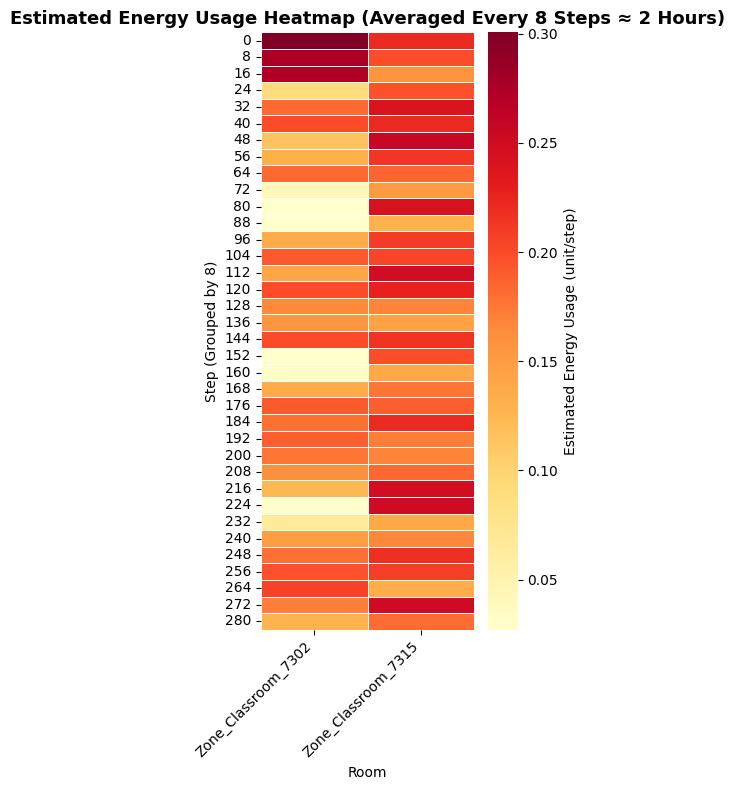

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สมมติใช้ AC = 1 unit per step
df['energy_usage'] = df['using_ac'].astype(int)

# จัดกลุ่ม step ละ 8 (~2 ชั่วโมง)
df['step_group'] = (df['step'] // 8) * 8

# รวมค่าเฉลี่ย Energy Usage ต่อ step_group ต่อห้อง
agg_energy = df.groupby(['step_group', 'room'])['energy_usage'].mean().reset_index()

# Pivot เพื่อทำ heatmap
pivot_energy = agg_energy.pivot(index='step_group', columns='room', values='energy_usage')

# ---------- Plot ----------
plt.figure(figsize=(4, 8))  # กะให้คล้ายกับ comfort heatmap
sns.heatmap(
    pivot_energy,
    cmap='YlOrRd',               # สีเหลือง→แดง = พลังงานสูง
    cbar_kws={'label': 'Estimated Energy Usage (unit/step)'},
    linewidths=0.5,
    annot=False,
    square=False,
    xticklabels=True,
    yticklabels=True
)

plt.title("Estimated Energy Usage Heatmap (Averaged Every 8 Steps ≈ 2 Hours)", fontsize=13, fontweight='bold')
plt.xlabel("Room")
plt.ylabel("Step (Grouped by 8)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("energy_usage_heatmap.png", dpi=300)
plt.show()


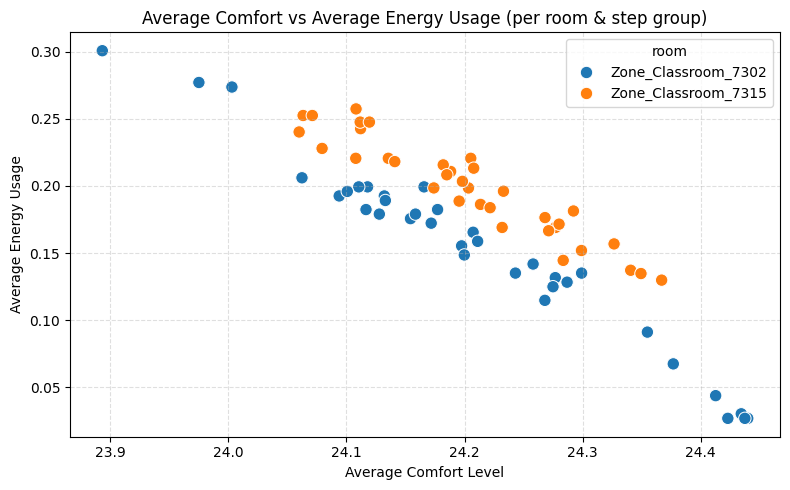

In [72]:
agg_df = df.groupby(['room', 'step_group']).agg(
    avg_comfort=('comfort_level', 'mean'),
    avg_energy=('energy_usage', 'mean')
).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=agg_df,
    x='avg_comfort',
    y='avg_energy',
    hue='room',
    s=80
)
plt.title("Average Comfort vs Average Energy Usage (per room & step group)")
plt.xlabel("Average Comfort Level")
plt.ylabel("Average Energy Usage")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig("average_comfort_vs_average_energy_usage.png", dpi=300) 
plt.show()


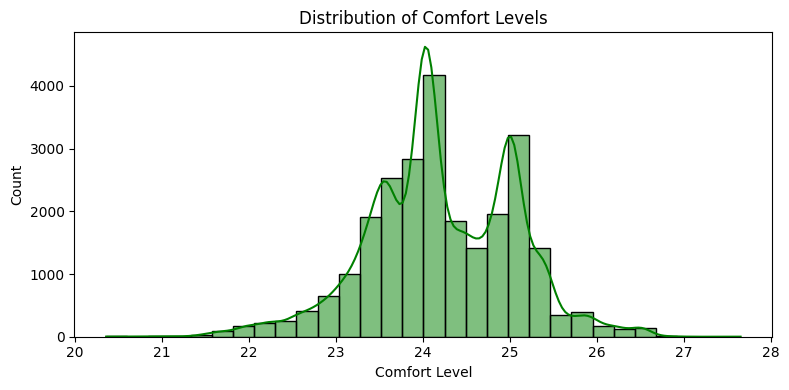

In [52]:
# ---------- 6. Distribution of Comfort Levels ----------
plt.figure(figsize=(8, 4))
sns.histplot(df['comfort_level'], kde=True, bins=30, color='green')
plt.title("Distribution of Comfort Levels")
plt.xlabel("Comfort Level")
plt.tight_layout()

plt.savefig("distribution_of_comfort_levels.png", dpi=300)  
plt.show()

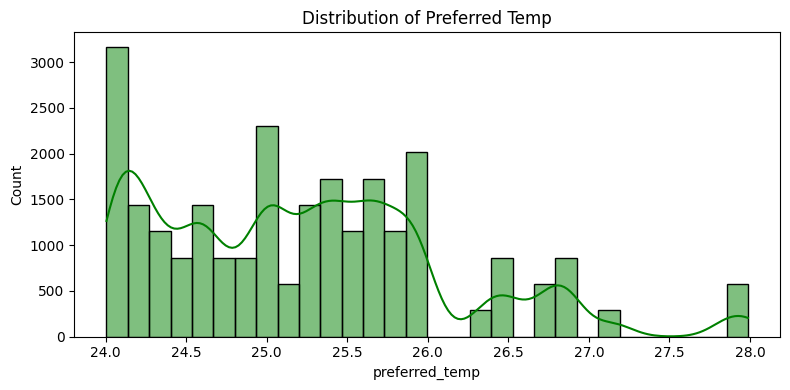

In [76]:
plt.figure(figsize=(8, 4))
sns.histplot(df['preferred_temp'], kde=True, bins=30, color='green')
plt.title("Distribution of Preferred Temp")
plt.xlabel("preferred_temp")
plt.tight_layout()

plt.savefig("distribution_of_preferred_temp.png", dpi=300)  
plt.show()

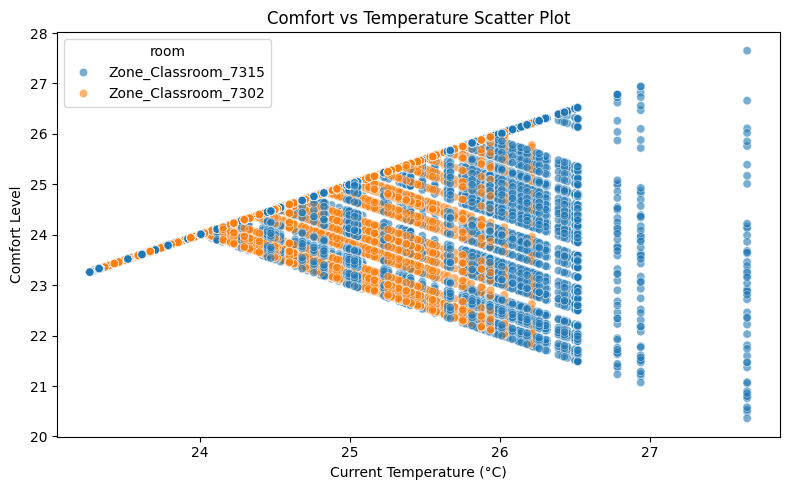

In [53]:
# ---------- 7. Comfort vs Temperature Scatter Plot ----------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='current_temp', y='comfort_level', hue='room', alpha=0.6)
plt.title("Comfort vs Temperature Scatter Plot")
plt.xlabel("Current Temperature (°C)")
plt.ylabel("Comfort Level")
plt.tight_layout()
plt.show()

/tmp/ipykernel_173414/2983543682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_comfort, x='room', y='comfort_level', palette='RdYlGn')


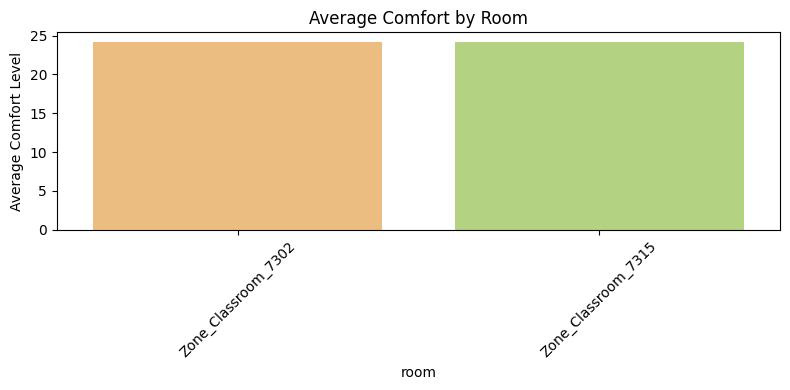

In [54]:
# ---------- 8. Average Comfort by Room ----------
avg_comfort = df.groupby('room')['comfort_level'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_comfort, x='room', y='comfort_level', palette='RdYlGn')
plt.title("Average Comfort by Room")
plt.ylabel("Average Comfort Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_173414/2656658331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room', y='current_temp', palette='coolwarm')


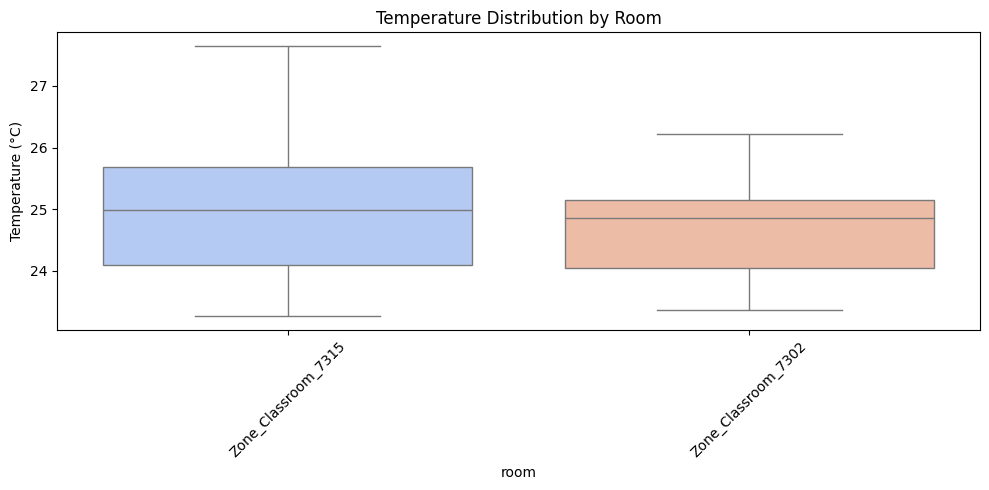

In [55]:
# ---------- 9. Temperature Distribution by Room ----------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='room', y='current_temp', palette='coolwarm')
plt.title("Temperature Distribution by Room")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

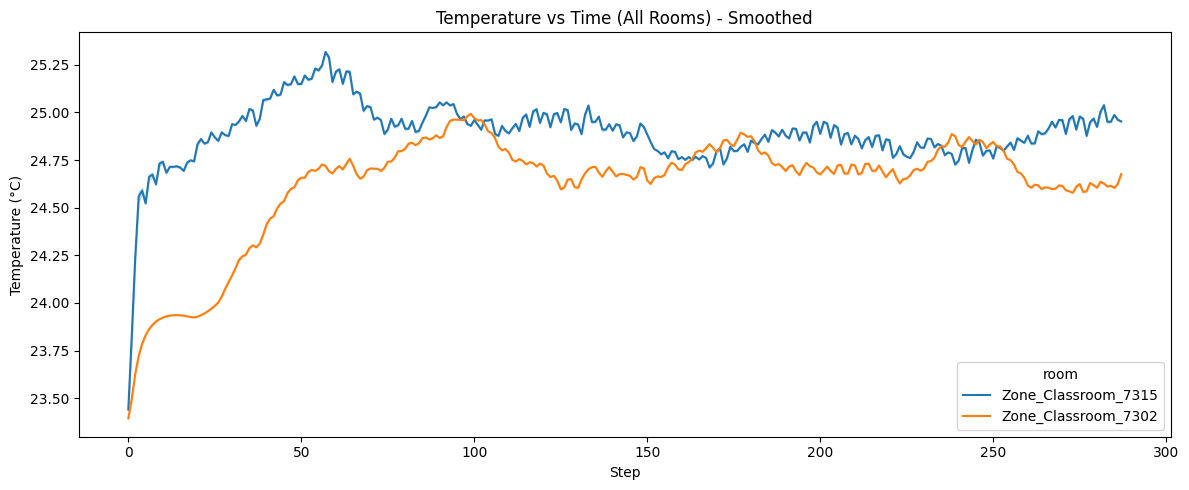

In [63]:
# ---------- 10. Temperature vs Time ----------
plt.figure(figsize=(12, 5))

# ใช้ rolling average window = 4 steps (~1 ชั่วโมง ถ้า 1 step = 15 นาที)
df_smooth = df.copy()
window_size = 1000

df_smooth['current_temp_smooth'] = df_smooth.groupby('room')['current_temp'] \
                                             .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

sns.lineplot(data=df_smooth, x='step', y='current_temp_smooth', hue='room')
plt.title("Temperature vs Time (All Rooms) - Smoothed")
plt.xlabel("Step")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


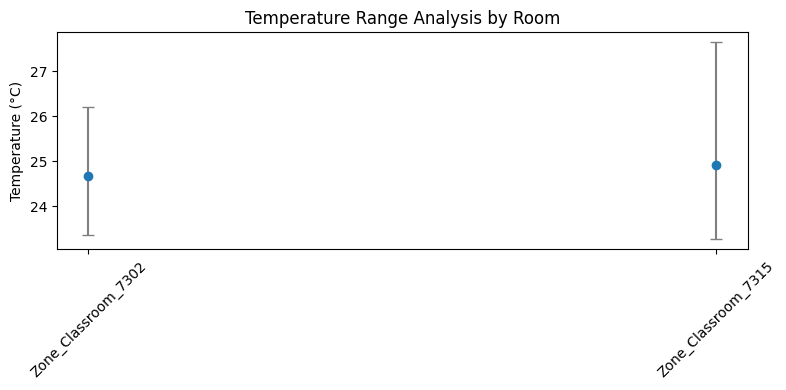

In [64]:
# ---------- 11. Temperature Range Analysis ----------
temp_stats = df.groupby('room')['current_temp'].agg(['min', 'mean', 'max']).reset_index()
plt.figure(figsize=(8, 4))
plt.errorbar(temp_stats['room'], temp_stats['mean'], 
             yerr=[temp_stats['mean'] - temp_stats['min'], temp_stats['max'] - temp_stats['mean']],
             fmt='o', ecolor='gray', capsize=4)
plt.title("Temperature Range Analysis by Room")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# ---------- 12. Summary Table ----------
summary = df.groupby('room').agg(
    Avg_Comfort=('comfort_level', 'mean'),
    AC_Usage=('ac_on', 'mean'),
    Avg_Temp=('current_temp', 'mean')
).reset_index()

# เพิ่ม Energy Efficiency (เชิงสาธิต)
summary['Energy_Efficiency'] = (1 - summary['AC_Usage']) * summary['Avg_Comfort'] / summary['Avg_Temp']

summary['AC_Usage'] = summary['AC_Usage'] * 100  # เปลี่ยนเป็น %
print("\n=== Summary Table ===")
print(summary.rename(columns={
    'room': 'Room',
    'Avg_Comfort': 'Avg Comfort',
    'AC_Usage': 'AC Usage (%)',
    'Avg_Temp': 'Avg Temp',
    'Energy_Efficiency': 'Energy Efficiency'
}).round(3))


=== Summary Table ===
                  Room  Avg Comfort  AC Usage (%)  Avg Temp  Energy Efficiency
0  Zone_Classroom_7302       24.215        14.940    24.665              0.835
1  Zone_Classroom_7315       24.207        19.662    24.912              0.781


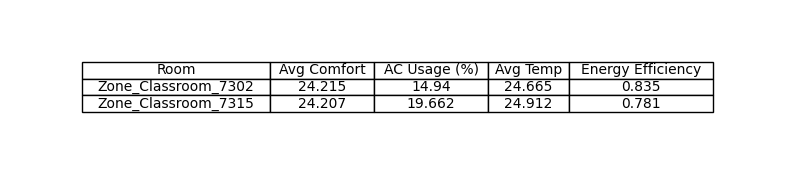

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# สมมติ summary เป็น DataFrame ของคุณ
summary_display = summary.rename(columns={
    'room': 'Room',
    'Avg_Comfort': 'Avg Comfort',
    'AC_Usage': 'AC Usage (%)',
    'Avg_Temp': 'Avg Temp',
    'Energy_Efficiency': 'Energy Efficiency'
}).round(3)

# สร้างภาพ
fig, ax = plt.subplots(figsize=(10, len(summary_display)*0.5 + 1))  # ปรับขนาดตามจำนวน row
ax.axis('off')  # ซ่อนแกน

# แสดงตาราง
tbl = ax.table(
    cellText=summary_display.values,
    colLabels=summary_display.columns,
    cellLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(summary_display.columns))))

# บันทึกเป็นไฟล์ภาพ
plt.savefig("summary_table.png", bbox_inches='tight', dpi=300)
plt.show()
